In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

columns = ['age','workclass','id','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Class']
# Load the Training set (adult_data.data)
df = pd.read_csv(r'C:\Users\OLUBISI\Desktop\Data Science Projects\IncomePredictionProject\adult.data', header=None, names=columns, sep=' *, *')

df.head()



,age,workclass,id,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
np.size(df)

488415

In [153]:
df.workclass = df.workclass.str.replace('?','Private', regex=False)
df.occupation = df.occupation.str.replace('?','Craft-repair', regex=False)
df.native_country = df.native_country.str.replace('?',' United-States', regex=False)

X = df[['age','workclass','id','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']].values
X[0:14] # take columns needed for analysis
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', ' United-States',
       'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
       'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia',
       'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti',
       'Portugal', 'Dominican-Republic', 'El-Salvador', 'France',
       'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   id              32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  Class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


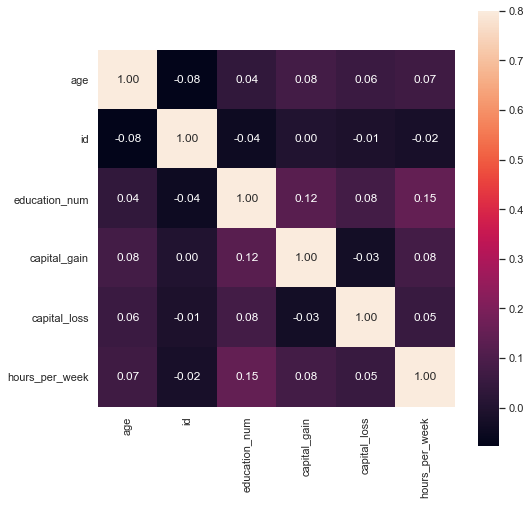

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(corrmat,annot=True, square=True, fmt='.2f', vmax=.8);

In [8]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
Label_encoder = preprocessing.LabelEncoder()
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['education'] =label_encoder.fit_transform(df['education'])
                                                  
df['marital_status']= label_encoder.fit_transform(df['workclass'])
df['occupation'] =label_encoder.fit_transform(df['education'])  
                                                  
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race'] =label_encoder.fit_transform(df['race'])
                                                  
df['sex']= label_encoder.fit_transform(df['sex'])
df['native_country'] =label_encoder.fit_transform(df['native_country'])
#df['Class'] = label_encoder.fit_transform(df['Class'])
                                                  
print(df.head(100))
                                                  

 

    age  workclass      id  education  education_num  marital_status  \
0    39          7   77516          9             13               7   
1    50          6   83311          9             13               6   
2    38          4  215646         11              9               4   
3    53          4  234721          1              7               4   
4    28          4  338409          9             13               4   
..  ...        ...     ...        ...            ...             ...   
95   29          2  115585         15             10               2   
96   48          6  191277         10             16               6   
97   37          4  202683         15             10               4   
98   48          4  171095          7             12               4   
99   32          1  249409         11              9               1   

    occupation  relationship  race  sex  capital_gain  capital_loss  \
0            9             1     4    1          2174           

In [9]:
X= df.drop('Class',axis=1)
y = df['Class']

print(df['Class'])

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
train_smote, class_smote = sm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_smote, class_smote, test_size=0.3, random_state=0)


0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: Class, Length: 32561, dtype: object


In [10]:
print('Train smote shape', train_smote.shape)
print('Train smote class shape', class_smote.shape)


Train smote shape (49440, 14)
Train smote class shape (49440,)


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

def getEvaluationMetrics(y_test, y_pred, bool=False):
  
  classifierMetrics = {}
  
  # Accuracy
  accuracy = accuracy_score(y_test,y_pred)
  print('Accuracy :',accuracy)

  classifierMetrics['Accuracy'] = accuracy
  
  # Classification Report
  print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K'], output_dict=bool))
  
  return classifierMetrics

def getConfusionMatrix(y_test, y_pred):
  # Confusion matrix
  mat = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(mat)
  TP = cm.iloc[1,1] # True Positive - Predicted >50K Correctly
  TN = cm.iloc[0,0] # True Negative - Predicted <=50K Incorrectly
  FP = cm.iloc[0,1] # False Positive - Predicted >50K when it didn't rain
  FN = cm.iloc[1,0] # False Negative - Predicted <=50K when it did rain

  print('Sensitivity: {:.2%}'.format(TP/(FN+TP)))
  print('Specificity: {:.2%}'.format(TN/(FP+TN)))
  
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
  plt.title('A confusion matrix showing the frequency of misclassifications by our classifier')
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  plt.show()

In [12]:
EvaluationMetrics = {}
#Train data
#Xtrain = data_norm_train.drop(columns='Class', axis=1)
#Ytrain = data_norm_train['Class']
X_train.describe()
print('Xtrain shape', X_train.shape)
print('Ytrain shape', Y_train.shape)

print('Xtest shape', X_test.shape)
print('Ytest shape', Y_test.shape)

Xtrain shape (34608, 14)
Ytrain shape (34608,)
Xtest shape (14832, 14)
Ytest shape (14832,)


Accuracy : 0.684668284789644
              precision    recall  f1-score   support

       <=50K       0.66      0.76      0.71      7472
        >50K       0.71      0.61      0.66      7360

    accuracy                           0.68     14832
   macro avg       0.69      0.68      0.68     14832
weighted avg       0.69      0.68      0.68     14832

Sensitivity: 60.75%
Specificity: 76.07%


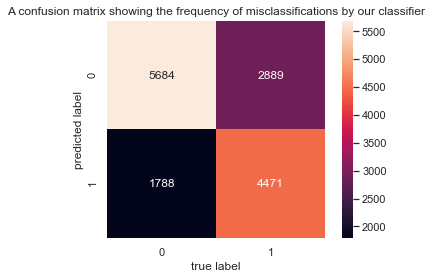

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

metrics = getEvaluationMetrics(Y_test,Y_pred)

# Get the Confusion Matrix
getConfusionMatrix(Y_test, Y_pred)

# Get the ROC Curve
#auc = getROCcurve(Ytest, lr.predict_proba(Xtest))
#metrics['AUC'] = auc

EvaluationMetrics['Logistic Regression'] = metrics

Accuracy : 0.8419633225458468
              precision    recall  f1-score   support

       <=50K       0.85      0.84      0.84      7472
        >50K       0.84      0.85      0.84      7360

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832

Sensitivity: 84.58%
Specificity: 83.82%


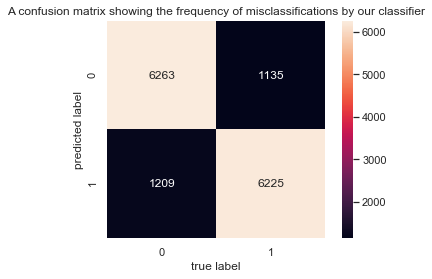

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

metrics = getEvaluationMetrics(Y_test,Y_pred)

# Get the Confusion Matrix
getConfusionMatrix(Y_test, Y_pred)

# Get the ROC Curve
#auc = getROCcurve(Ytest, dt.predict_proba(Xtest))
#metrics['AUC'] = auc

EvaluationMetrics['DecisionTreeClassifier'] = metrics

Accuracy : 0.8824163969795038
              precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88      7472
        >50K       0.88      0.88      0.88      7360

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

Sensitivity: 88.45%
Specificity: 88.04%


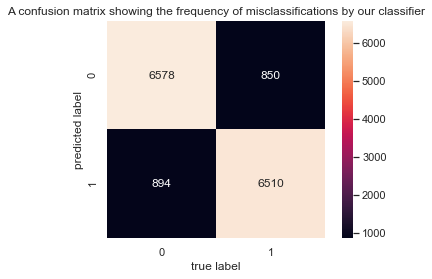

In [17]:
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features = 'true',
                            warm_start = 'true', n_estimators=20)
clf_bag.fit(X_train,Y_train)
Y_pred = clf_bag.predict(X_test)

metrics = getEvaluationMetrics(Y_test,Y_pred)

# Get the Confusion Matrix
getConfusionMatrix(Y_test, Y_pred)

EvaluationMetrics['BaggingClassifier'] = metrics